In [1]:

import re    # for regular expressions 
import nltk 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [124]:
Data = pd.read_csv(r"PreprocessedDataset.csv")
Data

,tweets,ClassLabel
0,users he should ask a few native americans what their take on this is,1
1,user user go home your edrunkusermagatrump2020 url,1
2,amazon is investigating chinese employees who are selling internal data to third party sellers looking for an edge in the competitive marketplace url amazon mag aka g china t cot,0
3,user someone shouldve taken this piece of shit to a volcano,1
4,user user obama wanted liberals and illegals to move into red states,0
...,...,...
13235,user sometimes i get strong vibes from people and this mans vibe is tens of millions of murder she is more dangerous than dt,1
13236,benidorm creamfields maga not too shabby of a summer,0
13237,user and why report this garbage we dont give a crap,1
13238,user pussy,1


In [125]:
len(Data)

13240

In [4]:
# !pip install wordsegment

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# train, test= train_test_split(Data, test_size=0.3, random_state=123)

In [123]:
# train

In [8]:
train.shape, test.shape

((9268, 2), (3972, 2))

In [9]:
# train["ClassLabel"].value_counts()

0    6205
1    3063
Name: ClassLabel, dtype: int64

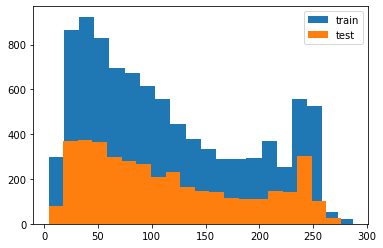

In [88]:
plt.hist(train.tweets.str.len(), bins=20, label='train')
plt.hist(test.tweets.str.len(), bins=20, label='test')
plt.legend()
plt.show()

In [4]:
# tokenized_tweet = Data.tweets.apply(lambda x: x.split())
# tokenized_tweet.head()

0                                                                                                                       [users, he, should, ask, a, few, native, americans, what, their, take, on, this, is]
1                                                                                                                                                 [user, user, go, home, your, edrunkusermagatrump2020, url]
2    [amazon, is, investigating, chinese, employees, who, are, selling, internal, data, to, third, party, sellers, looking, for, an, edge, in, the, competitive, marketplace, url, amazon, mag, aka, g, c...
3                                                                                                                                    [user, someone, shouldve, taken, this, piece, of, shit, to, a, volcano]
4                                                                                                                          [user, user, obama, wanted, liberals, and, illegals, to, 

In [5]:
# tokenized_tweet=pd.DataFrame(tokenized_tweet)
# tokenized_tweet

,tweets
0,"[users, he, should, ask, a, few, native, americans, what, their, take, on, this, is]"
1,"[user, user, go, home, your, edrunkusermagatrump2020, url]"
2,"[amazon, is, investigating, chinese, employees, who, are, selling, internal, data, to, third, party, sellers, looking, for, an, edge, in, the, competitive, marketplace, url, amazon, mag, aka, g, c..."
3,"[user, someone, shouldve, taken, this, piece, of, shit, to, a, volcano]"
4,"[user, user, obama, wanted, liberals, and, illegals, to, move, into, red, states]"
...,...
13235,"[user, sometimes, i, get, strong, vibes, from, people, and, this, mans, vibe, is, tens, of, millions, of, murder, she, is, more, dangerous, than, dt]"
13236,"[benidorm, creamfields, maga, not, too, shabby, of, a, summer]"
13237,"[user, and, why, report, this, garbage, we, dont, give, a, crap]"
13238,"[user, pussy]"


In [97]:
# !pip install wordcloud

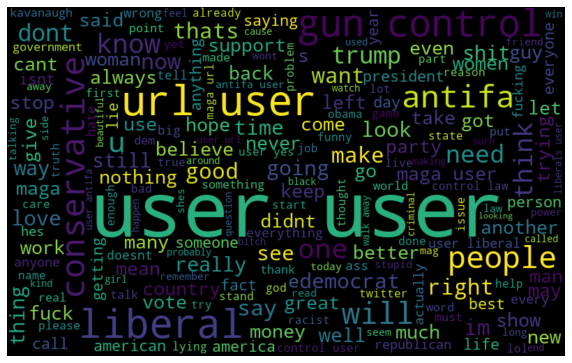

In [102]:
all_words = ' '.join([text for text in Data['tweets']]) 

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

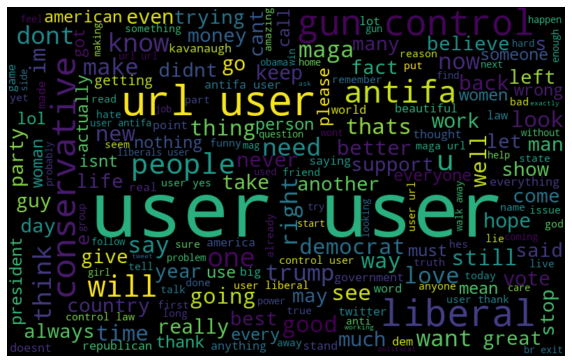

In [103]:
nonOff_words =' '.join([text for text in Data['tweets'][Data['ClassLabel'] == 0]]) 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(nonOff_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

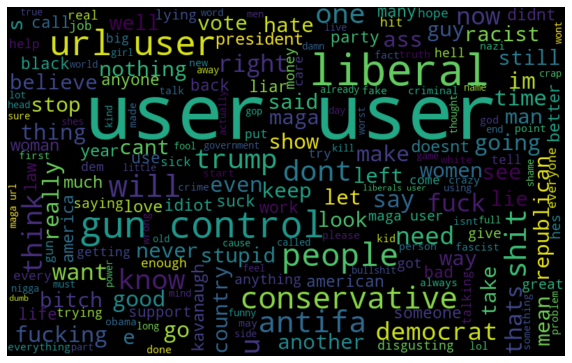

In [105]:
offensive_words =' '.join([text for text in Data['tweets'][Data['ClassLabel'] == 1]]) 

wordcloud = WordCloud(width=800, height=500, random_state=99, max_font_size=110).generate(offensive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [33]:
# tokenized_tweet.tweets[0]

['users',
 'he',
 'should',
 'ask',
 'a',
 'few',
 'native',
 'americans',
 'what',
 'their',
 'take',
 'on',
 'this',
 'is']

In [13]:
# Data.tweets=tokenized_tweet

In [6]:
Data

,tweets,ClassLabel
0,users he should ask a few native americans what their take on this is,1
1,user user go home your edrunkusermagatrump2020 url,1
2,amazon is investigating chinese employees who are selling internal data to third party sellers looking for an edge in the competitive marketplace url amazon mag aka g china t cot,0
3,user someone shouldve taken this piece of shit to a volcano,1
4,user user obama wanted liberals and illegals to move into red states,0
...,...,...
13235,user sometimes i get strong vibes from people and this mans vibe is tens of millions of murder she is more dangerous than dt,1
13236,benidorm creamfields maga not too shabby of a summer,0
13237,user and why report this garbage we dont give a crap,1
13238,user pussy,1


In [10]:
import nltk
# nltk.download('punkt')

In [11]:
from tqdm import tqdm

In [126]:
word_tokenizer = nltk.WordPunctTokenizer()
word_tokens = [word_tokenizer.tokenize(sent) for sent in tqdm(Data.tweets)]
print(word_tokens)

100%|██████████████████████████████████████████████████████████████████████████████| 13240/13240 [00:00<00:00, 132719.08it/s]

[['users', 'he', 'should', 'ask', 'a', 'few', 'native', 'americans', 'what', 'their', 'take', 'on', 'this', 'is'], ['user', 'user', 'go', 'home', 'your', 'edrunkusermagatrump2020', 'url'], ['amazon', 'is', 'investigating', 'chinese', 'employees', 'who', 'are', 'selling', 'internal', 'data', 'to', 'third', 'party', 'sellers', 'looking', 'for', 'an', 'edge', 'in', 'the', 'competitive', 'marketplace', 'url', 'amazon', 'mag', 'aka', 'g', 'china', 't', 'cot'], ['user', 'someone', 'shouldve', 'taken', 'this', 'piece', 'of', 'shit', 'to', 'a', 'volcano'], ['user', 'user', 'obama', 'wanted', 'liberals', 'and', 'illegals', 'to', 'move', 'into', 'red', 'states'], ['user', 'liberals', 'are', 'all', 'kookoo'], ['user', 'user', 'oh', 'no', 'es', 'tough', 'shit'], ['user', 'was', 'literally', 'just', 'talking', 'about', 'this', 'lol', 'all', 'mass', 'shootings', 'like', 'that', 'have', 'been', 'set', 'up', 'sits', 'propaganda', 'used', 'to', 'divide', 'us', 'on', 'major', 'issues', 'like', 'gun', 'c

In [54]:
len(word_tokens)

13240

In [127]:
# train

In [43]:
#!pip install gensim

In [14]:
from gensim.models.fasttext import FastText

In [128]:
Data    

,tweets,ClassLabel
0,users he should ask a few native americans what their take on this is,1
1,user user go home your edrunkusermagatrump2020 url,1
2,amazon is investigating chinese employees who are selling internal data to third party sellers looking for an edge in the competitive marketplace url amazon mag aka g china t cot,0
3,user someone shouldve taken this piece of shit to a volcano,1
4,user user obama wanted liberals and illegals to move into red states,0
...,...,...
13235,user sometimes i get strong vibes from people and this mans vibe is tens of millions of murder she is more dangerous than dt,1
13236,benidorm creamfields maga not too shabby of a summer,0
13237,user and why report this garbage we dont give a crap,1
13238,user pussy,1


In [129]:

embedding_size = 100
window_size = 5
min_word = 5

fast_Text_model = FastText(sentences=word_tokens,
vector_size=embedding_size,
window=window_size,
min_count=min_word,
workers = 4,
sg=1,
epochs=10)


In [133]:
# tr=train.T
# tr

In [130]:
# trwcl=tr.drop('ClassLabel', axis=0)
# trwcl

In [131]:
# tr.columns

In [132]:
# trwcl[4075]

In [134]:
a=pd.DataFrame()
aa=0
for i in Data.tweets:
    a[aa]=fast_Text_model.wv[i]
#     print(a[aa])
    aa+=1

In [135]:
a=a.transpose()
a

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.027225,0.007242,-0.032224,-0.070308,0.022522,-0.065434,0.009155,0.028041,0.058931,-0.031667,...,-0.023768,0.087705,0.018897,0.004613,0.017249,0.016201,-0.059286,-0.058403,0.035257,0.017005
1,0.003140,0.038802,-0.061986,-0.044428,0.006956,-0.084468,0.024176,0.077057,0.013092,-0.052733,...,-0.014946,0.049314,0.003613,0.013277,-0.008734,0.053832,-0.018871,-0.079015,0.018358,-0.025134
2,-0.023770,0.034827,-0.063236,-0.026286,0.034499,-0.041040,0.017952,0.083408,-0.004536,-0.035010,...,-0.018664,0.089963,0.001984,-0.002183,0.033300,-0.026413,-0.101326,-0.098398,0.008502,0.049449
3,-0.012303,-0.027787,-0.043248,-0.053094,-0.055221,-0.069722,0.040524,0.042442,0.019196,-0.021213,...,-0.016726,0.038868,0.017519,0.016896,0.008852,0.046839,-0.032305,-0.041018,0.037101,-0.017100
4,-0.030064,0.044226,-0.044530,-0.058765,0.045141,-0.087769,-0.007768,0.092099,0.046426,-0.035253,...,-0.002846,0.021474,-0.018477,0.023399,0.023228,0.010184,-0.090718,-0.073589,0.008010,0.021819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13235,-0.018137,0.009221,-0.002608,-0.020539,0.001838,-0.032956,-0.009157,0.027705,0.001341,-0.023724,...,-0.018302,0.048742,-0.013068,0.040789,-0.018834,-0.007993,-0.049575,-0.059793,0.010014,0.006899
13236,-0.013717,0.026481,-0.031562,-0.021167,0.007015,-0.020440,-0.006921,0.037793,0.002643,-0.025003,...,-0.020300,0.057986,-0.001820,0.005565,-0.006907,-0.003226,-0.057248,-0.068583,-0.017348,0.025400
13237,0.001043,0.015983,-0.040149,-0.017369,-0.025672,-0.051959,-0.008355,0.069038,0.033140,-0.020328,...,0.009950,0.077105,-0.001768,0.033004,-0.011613,0.036518,-0.030107,-0.087118,0.032015,-0.032835
13238,0.077550,0.095200,-0.030476,-0.055854,-0.032953,-0.109857,0.051155,0.185471,0.015869,-0.096691,...,0.078537,0.071464,-0.039633,0.093712,-0.057465,0.181171,0.069325,-0.097968,0.052747,-0.021709


In [60]:
# a.index=train.index

In [136]:
# a['ClassLabel']=train.ClassLabel
# a

In [137]:
# test

In [138]:
a.to_csv('embeddings_of_all_tweets.csv')

In [139]:
semantically_similar_words = {words: [item[0] for item in fast_Text_model.wv.most_similar([words], topn=5)]
                  for words in ['racist', 'gun', 'mean', 'hate', 'offensive']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

racist:['racism', 'racists', 'journalist', 'supremacist', 'farrakhan']
gun:['laws', 'control', 'guns', 'strict', 'controlled']
mean:['meant', 'means', 'meal', 'legit', 'surprise']
hate:['hates', 'hater', 'hateful', 'hated', 'haters']
offensive:['defensive', 'expensive', 'size', 'survive', 'abusive']


In [140]:
print(fast_Text_model.wv.similarity(w1='hate', w2='racism'))

0.63444805


In [141]:
# Emb_Data = pd.read_csv(r"embeddings_of_all_tweets.csv")
# Emb_Data=Emb_Data.drop(columns='Unnamed: 0')
# Emb_Data

In [142]:
# Emb_Data.drop('ClassLabel', axis=1)

In [143]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(a, Data['ClassLabel'],test_size=0.3, random_state=3 )

In [146]:
Train_X

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
4766,-0.089900,0.039730,-0.111993,-0.076975,0.127496,-0.016087,-0.017687,0.068628,0.085142,-0.066712,...,-0.077187,0.131687,-0.069321,0.034084,0.026878,-0.048629,-0.161473,-0.145301,0.027153,0.079505
3697,0.017813,0.004715,-0.018791,-0.008791,-0.006887,-0.039513,-0.004025,0.060522,0.010053,-0.033906,...,-0.003375,0.043777,0.003714,0.037847,-0.025190,0.029142,-0.058823,-0.068944,-0.005892,-0.043121
2429,0.009692,0.010224,-0.035325,-0.018589,0.009288,-0.048942,-0.003624,0.056920,0.022065,-0.026531,...,-0.022010,0.076666,0.024453,0.031599,-0.002738,0.038553,-0.038726,-0.071596,0.016677,0.007367
12517,-0.013011,-0.002934,-0.024931,0.011235,-0.013219,-0.035874,-0.022541,0.076614,0.063139,-0.032069,...,0.013597,0.087622,-0.016359,0.068520,-0.025363,0.055060,-0.049735,-0.108148,0.003725,-0.037591
7848,0.007016,0.008426,-0.020942,-0.043898,0.012845,-0.037489,-0.013241,0.090558,0.032468,-0.015849,...,-0.008656,0.075060,-0.038361,0.046983,-0.019414,0.031583,-0.071852,-0.084990,0.005129,0.022026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9160,0.032642,-0.006274,-0.041115,0.019589,0.001142,-0.034882,0.020771,0.135853,-0.040080,-0.112920,...,0.036527,0.097393,0.031064,0.083347,0.031430,0.070941,-0.013615,-0.124320,0.030963,-0.079270
9859,0.041399,0.005834,-0.076310,-0.059833,0.065236,-0.100548,0.078686,0.042902,0.019549,-0.056750,...,0.055509,0.084250,0.034426,-0.021966,-0.008598,-0.007179,-0.096789,-0.121657,0.010572,0.023463
11513,0.003702,0.016656,-0.038143,-0.047483,0.026371,-0.032515,0.007221,0.101168,0.040715,-0.051103,...,-0.021166,0.060427,-0.001000,0.037617,-0.033465,0.005028,-0.046517,-0.077932,0.019403,-0.010424
1688,0.016872,-0.002109,-0.016154,-0.004328,-0.025208,-0.032856,0.024806,0.083324,0.009751,-0.027970,...,0.016009,0.007701,-0.006576,0.046526,-0.027507,0.059189,-0.005525,-0.048198,0.022472,-0.027084


In [147]:
from sklearn import svm

In [150]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X, Train_Y)

SVC(gamma='auto', kernel='linear')

In [151]:
from sklearn.metrics import accuracy_score

In [152]:
# word_tokenizer_test = nltk.WordPunctTokenizer()
# word_tokens_test = [word_tokenizer.tokenize(sent) for sent in tqdm(test.tweets)]
# print(word_tokens_test)

In [153]:
# wtdf=pd.DataFrame()
# wtdf['tweets']=word_tokens_test
# wtdf

In [154]:
# # predict the labels on validation dataset
# predictions_SVM=[]
# for x in range(len(wtdf)):
#     predictions_SVM.append(SVM.predict(fast_Text_model.wv[wtdf[x]]))


In [157]:
predictions_SVM=SVM.predict(Test_X)

In [158]:
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, test.ClassLabel)*100)

SVM Accuracy Score ->  66.28902316213494


In [159]:
np.set_printoptions(threshold=np. inf)
predictions_SVM

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [105]:
tr_T=tr.T
tr_T['ClassLabel']

4075     0
7320     0
8236     1
12571    0
12567    0
        ..
5218     0
12252    1
1346     1
11646    0
3582     0
Name: ClassLabel, Length: 9268, dtype: object

In [89]:
te=test.T
te

,2977,10596,229,13202,5865,10340,8356,5161,3793,7118,...,5277,2724,5539,9411,9856,2260,11844,7337,7740,3431
tweets,user user i dont think moral psychology can fix the core problem and using the david brooks model to pander to the right wont fool them for long url i think the right embracing fascism to survive ...,user this is what happens when liberals get in control,user and here we have another demonstration that gun free zones dont work brought to you by a liberal who more than likely supports stricter gun control,be too rourke vs ted cruz latest polls democrat underdog shown with lead for first time in texas senate race newsweek maga url,user battle of the hags,user user user user whoa angie back off that logic your e going to confuse the liberals,user hope all them sandwich shave cheese to go with their wine maga,user wow you are so beautiful ayumi,user user user the ultra left thug a ratti are no joke either lets together condemn both antifa colleges that riot over ben shapiro speaking i definitely condemn any threats against her,user how to develop their competitive skills and social skills in homeschooling as my child too complain abt bullying and unjust behaviour of teachers since she is super active,...,user omg j ins laugh makes me wanna laugh my whole life he is so adorable,user you are so sweet and adorable opp a,user go home and sleep johny,user user i hope you dont make it,user unless you are user your knee will not be the same,user user users he was so freaking happy when she got her no from kavanaugh i seriously hope she has him for perjury or at least can force recusal either way she is an immensely elegant speaker cu...,user user its hard to say for sure because the thing was so oooo oooo dark almost like dc hasnt learned a damn thing from their disastrous run of films,user user user user user user user user user user user user user weve also written a post about 5 metrics to measure the success of your b2b podcast url,user white liberals like you and your colored ilk are easily worse than bigots you are nothing but a coward and victimhood enabler who wants to keep my kind impoverished via welfare and identity p...,people leaving racist comments on my posts will be instantly blocked there are low follow accounts posting this crap and i think they are trying to make mag a look bad if you are racist in any way...
ClassLabel,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1


In [90]:
b=pd.DataFrame()
bb=0
for i in te.columns:
    b[bb]=fast_Text_model.wv[i]
    bb+=1

In [52]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [107]:
a

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.011621,0.002176,-0.018667,-0.019707,0.013683,-0.008140,0.003811,0.012411,-0.007615,-0.004548,...,-0.000467,0.020569,0.005138,0.001185,-0.000617,-0.003154,-0.014901,-0.011425,-0.001777,-0.007919
1,-0.016637,0.020322,-0.020089,-0.012080,0.018324,-0.004571,-0.026543,-0.002014,-0.015489,-0.008143,...,-0.039300,0.013775,0.004604,0.002694,-0.004973,-0.003630,-0.028149,-0.032802,-0.009137,0.001534
2,0.016421,0.007697,-0.028171,-0.017274,0.018780,-0.015235,0.006616,0.011155,-0.011515,-0.005527,...,-0.008557,0.015872,0.008835,0.004979,-0.014320,-0.000352,-0.019330,-0.016302,-0.000902,-0.009880
3,0.003597,-0.003365,-0.005241,-0.001564,0.003109,-0.006172,0.003960,0.015766,0.000348,-0.004993,...,0.002605,0.002589,0.006085,0.003464,-0.008413,-0.002213,-0.007379,-0.001608,-0.007305,-0.010278
4,0.003345,0.000555,-0.004146,-0.003997,0.000476,-0.007697,0.000178,0.020397,-0.002601,-0.010189,...,-0.004527,0.011462,0.005887,0.008101,-0.007611,-0.000301,-0.007791,-0.012744,-0.004546,-0.007292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9263,-0.015120,0.018402,-0.019265,-0.024812,0.003623,-0.021381,-0.006289,0.024255,-0.012562,-0.005630,...,-0.006153,0.019985,-0.012150,0.005715,-0.006684,0.001293,-0.021513,-0.036890,-0.012263,0.000444
9264,-0.007970,0.017740,-0.015526,-0.016689,0.015417,-0.009894,0.008953,0.017557,-0.007748,-0.010773,...,-0.009180,0.024564,0.000021,0.005328,0.007702,-0.013924,-0.029597,-0.018600,-0.014881,0.013644
9265,-0.003184,0.008175,-0.013017,-0.013816,-0.000035,-0.013530,-0.003347,0.019670,0.001876,-0.005735,...,-0.016241,0.015956,-0.002201,-0.003971,-0.004744,-0.006146,-0.031792,-0.020550,-0.000889,0.006569
9266,-0.003639,0.002805,0.002003,-0.000738,0.000629,-0.000799,0.002833,-0.001047,-0.000088,0.000286,...,-0.000795,0.000085,0.002139,0.001691,0.000279,0.001737,0.002144,-0.000538,0.001090,-0.000442


In [121]:
tr_arr_cl=tr_T['ClassLabel']
tr_arr_cl.index=a.index
tr_arr_cl

0       0
1       0
2       1
3       0
4       0
       ..
9263    0
9264    1
9265    1
9266    0
9267    0
Name: ClassLabel, Length: 9268, dtype: object

In [122]:
rf = RandomForestClassifier(n_estimators=400, random_state=15,verbose=1).fit(a, tr_arr_cl) 


ValueError: Unknown label type: 'unknown'